In [1]:
import os
import numpy as np
import torch
from torch import nn, optim
from torch.utils.data import Dataset, DataLoader, random_split
from torchvision import transforms
import torchvision
import tifffile as tiff
import matplotlib.pyplot as plt
import time
from tqdm import tqdm
from copy import deepcopy
import random
from sklearn.preprocessing import normalize

from collections import Counter
from scipy.stats import mode

In [2]:
ex =  torch.load('ex_flattened_images.pt')
control =  torch.load('control_flattened_images.pt')
sd =  torch.load('sd_flattened_images.pt')
eucli_centroid = torch.load('eucli_centroid_tensor.pt')


C:\Users\k54739\AppData\Local\Temp\ipykernel_16808\519199735.py:1: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  ex =  torch.load('ex_flattened_images.pt')
C:\Users\k54739\A

In [3]:
print(ex.shape)
print(control.shape)
print(sd.shape)
print(eucli_centroid.shape)


torch.Size([29, 27648])
torch.Size([120, 27648])
torch.Size([103, 27648])
torch.Size([1, 27648])


import torch

def normalize_tensor(tensor, dim=1):
    """
    Normalize a PyTorch tensor along the specified dimension.
    
    Args:
        tensor (torch.Tensor): Input tensor to normalize (e.g., shape [N, D]).
        dim (int): Dimension along which to normalize. Default is 1 (rows).
    
    Returns:
        torch.Tensor: Normalized tensor with the same shape as input.
    """
    # Compute the L2 norm along the specified dimension
    norm = torch.norm(tensor, p=2, dim=dim, keepdim=True)
    
    # Avoid division by zero
    norm = torch.clamp(norm, min=1e-8)
    
    # Normalize the tensor
    normalized_tensor = tensor / norm
    return normalized_tensor


# Normalize each group
normalized_ex = normalize_tensor(ex, dim=1)  # Normalize each row
normalized_control = normalize_tensor(control, dim=1)
normalized_sd = normalize_tensor(sd, dim=1)
normalised_cosine_centroid = cosine_centroid

# Print shapes to verify
print("Normalized shapes:")
print(normalized_ex.shape)  # Should match ex.shape
print(normalized_control.shape)  # Should match control.shape
print(normalized_sd.shape) 
print(normalised_cosine_centroid.shape) 


#check for nomralisation

import numpy as np

# Calculate the L2 norm of each row in exp_np_norm
norms = np.linalg.norm(cosine_centroid, axis=1)

# Check if all norms are close to 1
if np.allclose(norms, 1.0, atol=1e-6):
    print("All feature vectors are normalized.")
else:
    print("Some feature vectors are not normalized.")
    print("Norms:", norms)


In [4]:
import torch
import matplotlib.pyplot as plt

def calculate_and_plot_euclidean_distances(centroid, groups, group_names, bins=20):

    assert len(groups) == len(group_names), "Each group must have a corresponding name"
    
    euclidean_distances  = {}
    
    # Calculate cosine distances for each group
    for group, name in zip(groups, group_names):
        # Ensure the centroid and group are on the same device
        centroid = centroid.to(group.device)
        
        
        distances = torch.norm(group - centroid.expand_as(group), dim=1)  # L2 norm along features
        
        # Store distances
        euclidean_distances[name] = distances.cpu().numpy()
    
    # Plot distributions
    plt.figure(figsize=(12, 6))
    for name, distances in euclidean_distances.items():
        plt.hist(distances, bins=bins, alpha=0.6, label=name, edgecolor="black")
    
    plt.title("Euclidean Distance Distribution Across Groups", fontsize=14)
    plt.xlabel("Euclidean Distance", fontsize=12)
    plt.ylabel("Frequency", fontsize=12)
    plt.legend(fontsize=10)
    plt.grid(alpha=0.3)
    plt.show()
    
    return euclidean_distances


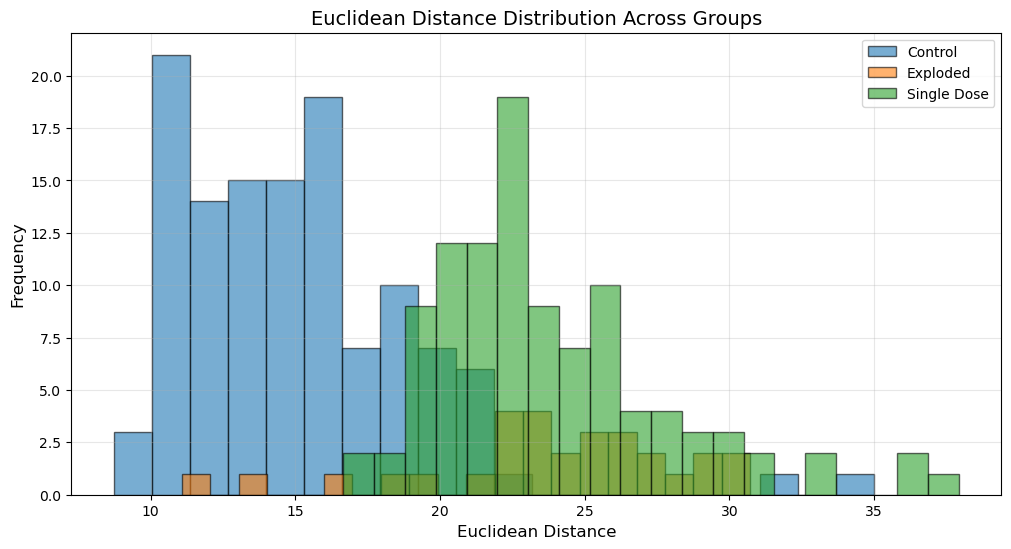

In [5]:
# Groups and names
groups = [control, ex, sd]
group_names = ["Control", "Exploded", "Single Dose"]

# Calculate distances and plot
cosine_distances = calculate_and_plot_euclidean_distances(
    centroid=eucli_centroid,
    groups=groups,
    group_names=group_names,
    bins=20
)

# Access calculated distances
control_distances = cosine_distances["Control"]
exploded_distances = cosine_distances["Exploded"]
single_dose_distances = cosine_distances["Single Dose"]

In [6]:
control_distances.shape

(120,)

In [7]:
exploded_distances.shape

(29,)

In [8]:
single_dose_distances.shape

(103,)